<a href="https://colab.research.google.com/github/adi290491/Car-Price-Prediction/blob/main/Book_Recommender_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

%matplotlib inline


In [6]:
ratings_df = pd.read_csv('/gdrive/My Drive/Colab Notebooks/data/BX-Book-Ratings.csv', sep=';', encoding="latin-1", error_bad_lines=False)
ratings_df.columns = ['User_ID', 'ISBN', 'Book_Rating']
ratings_df.head()

,User_ID,ISBN,Book_Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [7]:
users_df = pd.read_csv('/gdrive/My Drive/Colab Notebooks/data/BX-Users.csv', sep=';', encoding="latin-1", error_bad_lines=False)
users_df.columns = ['User_ID', 'Location', 'Age']
users_df.head()

,User_ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [8]:
books_df = pd.read_csv('/gdrive/My Drive/Colab Notebooks/data/BX-Books.csv', sep=';', encoding="latin-1", error_bad_lines=False)
books_df.columns = ['ISBN', 'Book_Title', 'Book_Author', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']
books_df.head()

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:27

,ISBN,Book_Title,Book_Author,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [9]:
print(ratings_df.shape)
print(users_df.shape)
print(books_df.shape)

(1149780, 3)
(278858, 3)
(271360, 8)


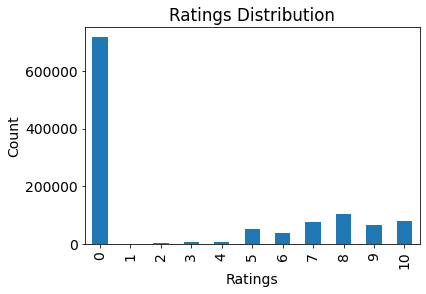

In [10]:
plt.rc("font", size=14)
ratings_df['Book_Rating'].value_counts(sort=False).plot.bar()
plt.title('Ratings Distribution')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

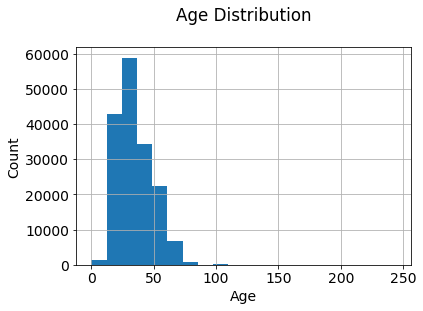

In [11]:
users_df['Age'].hist(bins=20)
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [12]:
books_rating_count_threshold = 20
users_rating_count_threshold = 20

In [13]:
user_rating_count = ratings_df['User_ID'].value_counts() 
ratings_df = ratings_df[ratings_df['User_ID'].isin(user_rating_count[user_rating_count >= users_rating_count_threshold].index)]
ratings_df

,User_ID,ISBN,Book_Rating
31,276762,034544003X,0
32,276762,0380000059,0
33,276762,0380711524,5
34,276762,0451167317,0
35,276762,0451454952,0
...,...,...,...
1149744,276688,0836236688,10
1149745,276688,0892966548,10
1149746,276688,1551669315,6
1149747,276688,1575660792,7


In [14]:
books_rating_count = ratings_df['ISBN'].value_counts()
ratings_df = ratings_df.loc[ratings_df['ISBN'].isin(books_rating_count[books_rating_count >= books_rating_count_threshold].index)]
ratings_df.head()

,User_ID,ISBN,Book_Rating
33,276762,0380711524,5
34,276762,0451167317,0
173,276847,0446364193,0
182,276847,3426029553,8
413,276925,002542730X,10


In [15]:
combine_book_ratings = ratings_df.merge(books_df, left_on='ISBN', right_on='ISBN', how='left')
cols_to_drop = ['Book_Author', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']
combine_book_ratings.drop(columns=cols_to_drop, axis=1, inplace=True)
combine_book_ratings.head()

,User_ID,ISBN,Book_Rating,Book_Title
0,276762,0380711524,5,See Jane Run
1,276762,0451167317,0,The Dark Half
2,276847,0446364193,0,Along Came a Spider (Alex Cross Novels)
3,276847,3426029553,8,NaN
4,276925,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...


In [16]:
combine_book_ratings = combine_book_ratings.dropna(axis = 0, subset = ['Book_Title'])
book_rating_count = (combine_book_ratings.groupby('Book_Title')['Book_Rating']
 .count()
 .reset_index()
 .rename(columns={'Book_Rating':'Book_Rating_Count'})
 [['Book_Title','Book_Rating_Count']]
 )
book_rating_count.head()

,Book_Title,Book_Rating_Count
0,'Salem's Lot,24
1,10 Lb. Penalty,37
2,"14,000 Things to Be Happy About",25
3,16 Lighthouse Road,55
4,1984,154


In [17]:
total_ratings_count_df = pd.merge(combine_book_ratings, book_rating_count, on='Book_Title', how='left')
total_ratings_count_df.head()

,User_ID,ISBN,Book_Rating,Book_Title,Book_Rating_Count
0,276762,0380711524,5,See Jane Run,38
1,276762,0451167317,0,The Dark Half,159
2,276847,0446364193,0,Along Came a Spider (Alex Cross Novels),220
3,276925,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,135
4,276925,0060520507,0,"Sushi for Beginners : A Novel (Keyes, Marian)",21


In [18]:
book_rating_count['Book_Rating_Count'].describe()

count    4875.000000
mean       52.498462
std        55.952932
min        20.000000
25%        24.000000
50%        33.000000
75%        56.000000
max      1198.000000
Name: Book_Rating_Count, dtype: float64

In [19]:
book_rating_count['Book_Rating_Count'].quantile(np.arange(0.9,1,0.01))

0.90    104.60
0.91    110.34
0.92    119.08
0.93    126.00
0.94    138.00
0.95    151.00
0.96    165.04
0.97    189.00
0.98    223.56
0.99    296.52
Name: Book_Rating_Count, dtype: float64

In [20]:
popularity_threshold = 50
popular_books = total_ratings_count_df.query('Book_Rating_Count >= @popularity_threshold')
popular_books.head()

,User_ID,ISBN,Book_Rating,Book_Title,Book_Rating_Count
1,276762,0451167317,0,The Dark Half,159
2,276847,0446364193,0,Along Came a Spider (Alex Cross Novels),220
3,276925,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,135
5,276925,0316666343,0,The Lovely Bones: A Novel,751
7,276925,0385504209,8,The Da Vinci Code,550


In [21]:
popular_books.shape

(155803, 5)

In [22]:
from scipy.sparse import csr_matrix
popular_books = popular_books.drop_duplicates(['Book_Title','User_ID'])
popular_books_pivot = popular_books.pivot(index='Book_Title', columns='User_ID', values='Book_Rating').fillna(0)
user_rating_matrix = csr_matrix(popular_books_pivot.values)
user_rating_matrix

<1456x6612 sparse matrix of type '<class 'numpy.float64'>'
	with 50968 stored elements in Compressed Sparse Row format>

In [23]:
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit((user_rating_matrix))

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [24]:
popular_books_pivot.head()

User_ID,242,243,254,383,388,408,446,487,503,507,626,638,643,651,709,728,735,741,805,882,901,929,1025,1131,1211,1248,1424,1435,1485,1548,1674,1733,1812,1848,1903,1928,2010,2012,2030,2033,...,276847,276925,276929,276939,276954,276964,277157,277168,277171,277187,277195,277203,277272,277378,277427,277466,277478,277523,277639,277711,277744,277901,277928,277945,277965,277984,278026,278137,278144,278188,278194,278202,278221,278356,278418,278535,278582,278633,278843,278851
Book_Title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
16 Lighthouse Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
204 Rosewood Lane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
query_index = np.random.choice(user_rating_matrix.shape[0])
popular_books_pivot.iloc[query_index,:].values.reshape(1,-1)

array([[0., 0., 0., ..., 0., 0., 0.]])

In [26]:
distances, indices = model_knn.kneighbors(popular_books_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)
popular_books_pivot.index[query_index]

"Fortune's Hand"

In [28]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Top 5 Recommendations for users who read {0}:\n'.format(popular_books_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, popular_books_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Top 5 Recommendations for users who read Fortune's Hand:

1: High Tide, with distance of 0.7733996488374435:
2: Sea Swept (Quinn Brothers (Paperback)), with distance of 0.8001098866947303:
3: Cordina's Crown Jewel, with distance of 0.8155970707609004:
4: Critical Mass, with distance of 0.8177468869369552:
5: Stanislaski Sisters, with distance of 0.8267767242454096:


In [29]:
import pickle
file = open('/gdrive/My Drive/Colab Notebooks/recommendation_knn_model.pkl', 'wb')
pickle.dump(model_knn, file)

In [31]:
!git init


Initialized empty Git repository in /content/.git/


In [32]:
!git add .

In [34]:
!git add README.md

fatal: pathspec 'README.md' did not match any files


In [35]:
!git commit -m "first commit"


*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@d4f97f8c3dcb.(none)')


In [37]:
!git config --global user.email "adityasawant.294@gmail.com"
!git config --global user.name "adi290491"

In [39]:
!git commit -m "first commit"

[master (root-commit) fb018d5] first commit
 19 files changed, 50690 insertions(+)
 create mode 100644 .config/.last_opt_in_prompt.yaml
 create mode 100644 .config/.last_survey_prompt.yaml
 create mode 100644 .config/.last_update_check.json
 create mode 100644 .config/active_config
 create mode 100644 .config/config_sentinel
 create mode 100644 .config/configurations/config_default
 create mode 100644 .config/gce
 create mode 100644 .config/logs/2021.04.21/13.37.59.675948.log
 create mode 100644 .config/logs/2021.04.21/13.38.18.505216.log
 create mode 100644 .config/logs/2021.04.21/13.38.33.645732.log
 create mode 100644 .config/logs/2021.04.21/13.38.39.238346.log
 create mode 100644 .config/logs/2021.04.21/13.38.55.616588.log
 create mode 100644 .config/logs/2021.04.21/13.38.56.174593.log
 create mode 100755 sample_data/README.md
 create mode 100755 sample_data/anscombe.json
 create mode 100644 sample_data/california_housing_test.csv
 create mode 100644 sample_data/california_housing_

In [40]:
!git branch -M main

In [41]:
!git remote add origin https://github.com/adi290491/Book-Recommendation-System.git

In [42]:
!git push -u origin main

fatal: could not read Username for 'https://github.com': No such device or address
